#  Изучение закономерностей, определяющих успешность игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

Данные за 2016 год могут быть неполными.

## Ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data=pd.read_csv('/datasets/games.csv')
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть пропуски в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'. Строчки с пропущенными данными в 'Name', 'Year_of_Release', 'Genre' я удалю, т.к. их мало (не больше 2-хпроцентов) и данные не заполнить средними значениями. Также имеет заменить типы данных в столбцах 'Year_of_Release' и 'Critic_Score' и 'User_Score'.


<h2>Подготовка данных</h2>

In [3]:
#Приведем названия стобцов к единому регистру:
data.columns # получили список названий столбцов
new_columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
data.set_axis(new_columns,axis='columns',inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Приведем данные к нужно типу:
data['year_of_release']=pd.to_datetime(data['year_of_release'], format='%Y')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [5]:
#Удалим пропуски:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)  
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       9839 non-null   object        
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


In [6]:
#Проверим на дубли:
data.duplicated().sum()

0

Явных дублей нет.

In [7]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010-01-01,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005-01-01,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011-01-01,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010-01-01,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010-01-01,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001-01-01,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003-01-01,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008-01-01,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008-01-01,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


"tbd" расшифровывается как To Be Determined - будет определено, это игры по которым оценка еще не сформирована - мало отзывов. Т.к. довольно большой процент строк имеет данное значение, то заменю значение на NaN, чтобы была возмжность дальнейшей обработки информации.

In [8]:
#замена значений в столбце
data.loc[data['user_score']=='tbd','user_score']='NaN'
#Теперь можно заменить тип данных в столбце 'user_score'
data['user_score']=data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


In [9]:
#Добавим столбец с суммарными продажами:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

<h2>Исследовательский анализ данных</h2>

<h3>Сколько игр выпускалось в разные годы.</h3>

<AxesSubplot:title={'center':'Выпуск игр по годам'}, xlabel='год выпуска'>

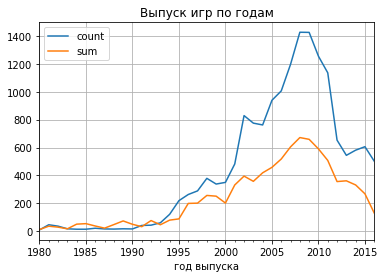

In [10]:
#data.groupby('year_of_release')['total_sales'].sum().count()
data_years_release=data.pivot_table(index = 'year_of_release', values='total_sales', aggfunc=('count','sum'))

data_years_release.plot(grid = True, title='Выпуск игр по годам', xlabel='год выпуска')

До 1994 года в мире выпускалось меньше 100 игр в год и только с 1996 года количество продаваемых копий перевалило за 100 млн. Данные до 1996 года к тому же старые, так что, думаю, они уже не очень актуальны и важны. C 2009 года начался спад в игровой индустрии - выходит меньше игр и уменьшились сборы.

<h3>Как менялись продажи по платформам</h3>

<AxesSubplot:title={'center':'Выпуск игр по платформам'}, xlabel='год выпуска'>

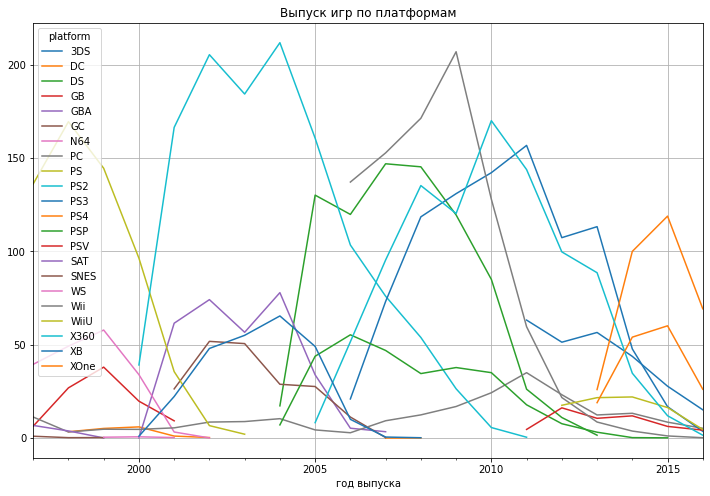

In [11]:
data_platform=data.query('year_of_release>1996').pivot_table(
    index=('platform'), values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending = False)

top_5_platform=data_platform.query('total_sales>800').index

data.query('year_of_release>1996').pivot_table(
    index='year_of_release',columns='platform',values='total_sales', aggfunc='sum').plot(
    grid = True,figsize = (12,8), title='Выпуск игр по платформам', xlabel='год выпуска')


В среднем, популярные компании "живут" около 8-10 лет, причем появились все эти компании в основном за 2 года: с 2004 по 2006, т.е. происходит смена поколей. Поэтому я считаю, что новый период актуально брать с 2012 года. 

<h3> Лидирующие платформы по продажам</h3>

,total_sales
platform,
PS4,314.14
XOne,159.32
3DS,143.25
WiiU,64.63
PC,39.43
PSV,32.99
PSP,3.50


<AxesSubplot:title={'center':'Топ прибыльных платформ'}, xlabel='Год выпсука'>

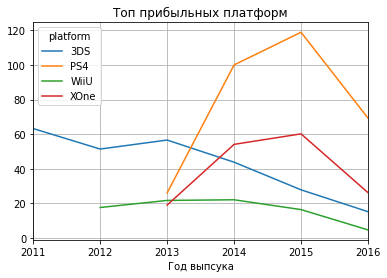

In [12]:
data_platform_new=data.query(
    'year_of_release>2012 and platform not in @top_5_platform').pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending = False)
display(data_platform_new)
top_platform_new=data_platform_new.query('total_sales>50').index
top_platform_new
data.query('platform in @top_platform_new').pivot_table(
    index='year_of_release',columns='platform',values='total_sales', aggfunc='sum').plot(
    grid = True, title='Топ прибыльных платформ', xlabel='Год выпсука')

В актуальном периоде игровая отрасль, судя по данным испытывает спад. Выбрала 4 наиболее перспективные компании, 3 из них вышли на рынок после 2012 года.

<h3>Глобальные продажи игр в разбивке по платформам</h3>

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

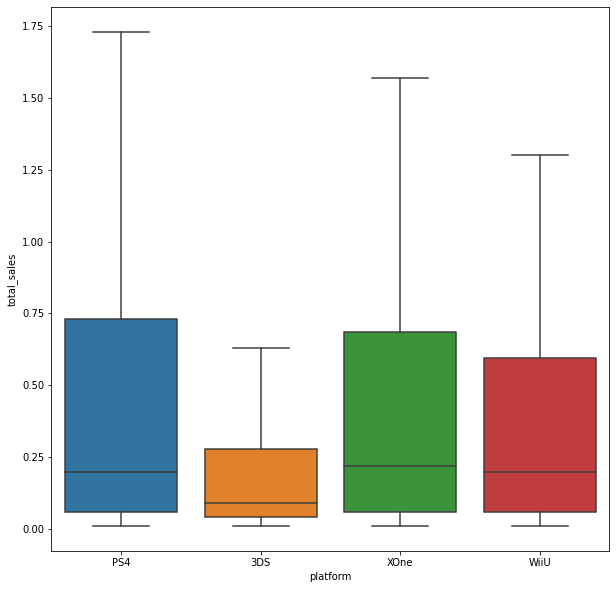

In [13]:
actual_data=data.query('year_of_release>2012')
platform_top=actual_data[actual_data['platform'].isin(['PS4', 'XOne', '3DS', 'WiiU'])]
plt.figure(figsize=(10,10))
sns.boxplot(data=platform_top, x='platform', y='total_sales', showfliers = False)


По боксплоту видно, что объем продаж и средние продажи сильно отличаются по платформам, наилучшие показатели у 'PS4'и 'XOne'. 

<h3>Корреляция между отзывами и продажами</h3>

Корреляция между оценками критиков и продажами:  0.406567902061781
Корреляция между оценками пользователей и продажами:  -0.031957110204556376


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

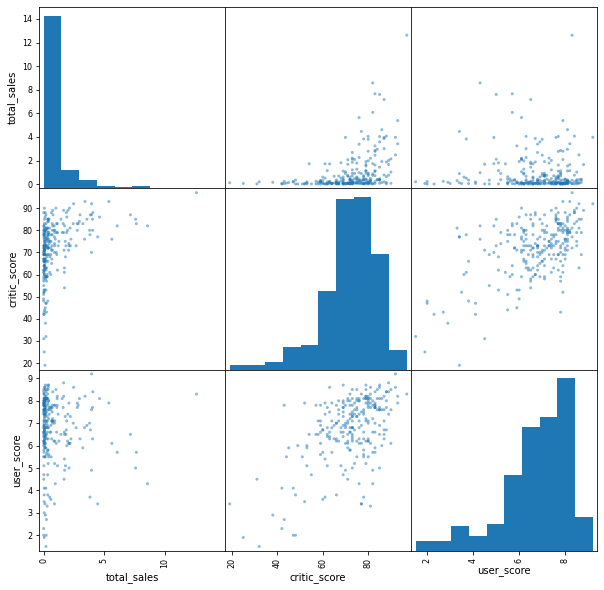

In [14]:
#возьмем наиболее популярную платформу PS4:
play_station_4=actual_data[actual_data['platform']=='PS4']
#посчитаем корреляцию:
print('Корреляция между оценками критиков и продажами: ', 
      play_station_4['total_sales'].corr(play_station_4['critic_score']) )
print('Корреляция между оценками пользователей и продажами: ', 
      play_station_4['total_sales'].corr(play_station_4['user_score']) )
#построим диаграмму рассеяния:
pd.plotting.scatter_matrix(play_station_4[['total_sales', 'critic_score', 'user_score']],figsize=(10,10))

Взаимосвязь между рейтингами и продажами есть, но довольно слабая, причем зачастую игры продаются весьма неплохо, несмотря на низкие оценки пользователей.

<h3>Корреляция между оценками игр и продажами</h3>

Корреляция между оценками критиков и продажами:  0.41699832800840175
Корреляция между оценками пользователей и продажами:  -0.06892505328279412


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

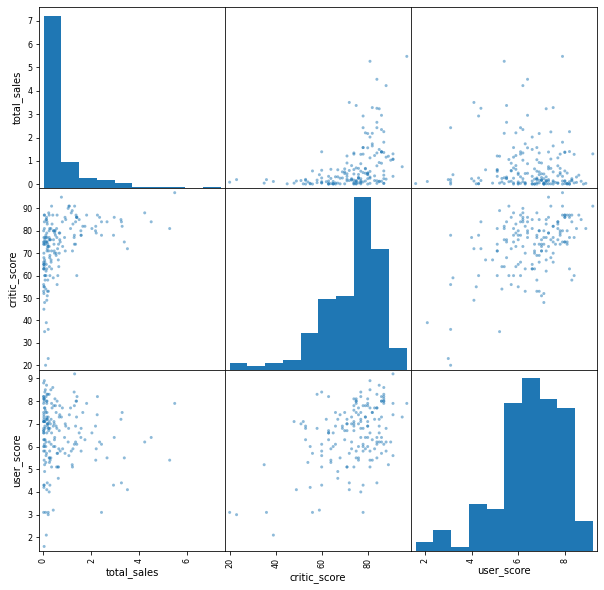

In [15]:
#XOne
x_one=actual_data[actual_data['platform']=='XOne']
#посчитаем корреляцию:
print('Корреляция между оценками критиков и продажами: ', x_one['total_sales'].corr(x_one['critic_score']) )
print('Корреляция между оценками пользователей и продажами: ', x_one['total_sales'].corr(x_one['user_score']) )
#построим диаграмму рассеяния:
pd.plotting.scatter_matrix(x_one[['total_sales', 'critic_score', 'user_score']],figsize=(10,10))

Для x_one также слабая корреляция между продажами и оценками критикой и практически отсутствует корреляция между продажами и оценками пользователей.

Корреляция между оценками критиков и продажами:  0.35705661422881035
Корреляция между оценками пользователей и продажами:  0.24150411773563016


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

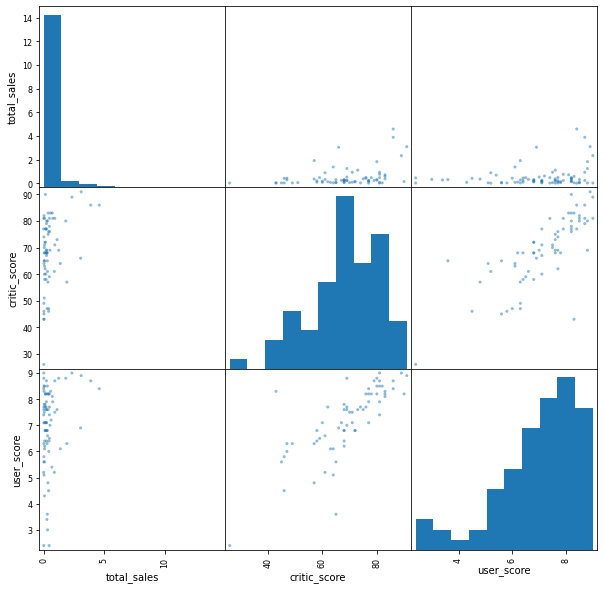

In [16]:
#3DS
platform_3ds=actual_data[actual_data['platform']=='3DS']
#посчитаем корреляцию:
print('Корреляция между оценками критиков и продажами: ', platform_3ds['total_sales'].corr(platform_3ds['critic_score']) )
print('Корреляция между оценками пользователей и продажами: ', platform_3ds['total_sales'].corr(platform_3ds['user_score']) )
#построим диаграмму рассеяния:
pd.plotting.scatter_matrix(platform_3ds[['total_sales', 'critic_score', 'user_score']],figsize=(10,10))

Корреляция слабая между оценками и продажами.

Корреляция между оценками критиков и продажами:  0.3764149065423912
Корреляция между оценками пользователей и продажами:  0.4193304819266187


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

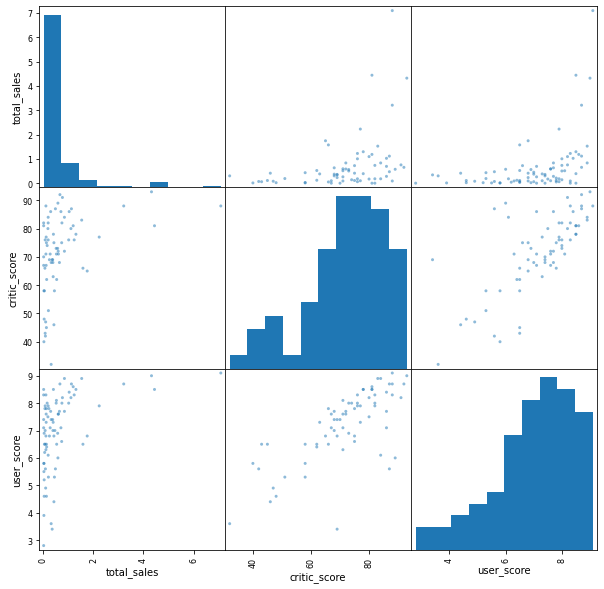

In [17]:
#WiiU
wiiu=actual_data[actual_data['platform']=='WiiU']
#посчитаем корреляцию:
print('Корреляция между оценками критиков и продажами: ', wiiu['total_sales'].corr(wiiu['critic_score']) )
print('Корреляция между оценками пользователей и продажами: ', wiiu['total_sales'].corr(wiiu['user_score']) )
#построим диаграмму рассеяния:
pd.plotting.scatter_matrix(wiiu[['total_sales', 'critic_score', 'user_score']],figsize=(10,10))

Корреляция по всем платформам слабая между оценками и продажами, может дело в росте популярности стриминговых платформ?

<h3>Распределение игр по жанрам</h3>

<AxesSubplot:title={'center':'Распределение прибыли по жанрам'}, ylabel='sum'>

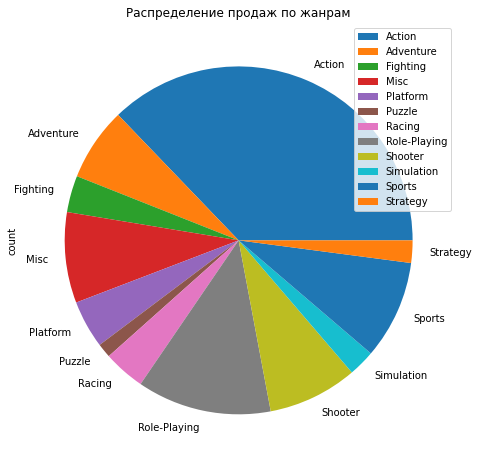

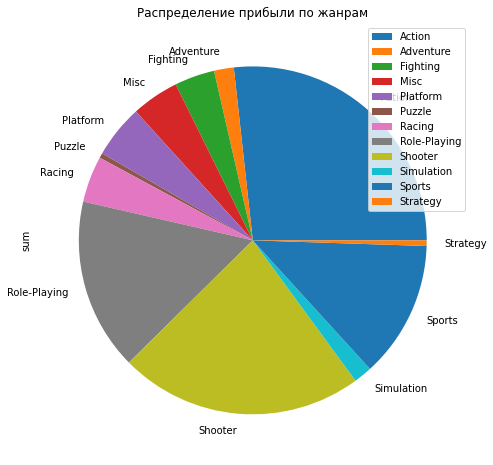

In [18]:
platform_top.pivot_table(index='genre',values='total_sales',aggfunc=('count', 'sum')).plot(
    y='count',kind='pie',figsize=(8,8), title='Распределение продаж по жанрам')
platform_top.pivot_table(index='genre',values='total_sales',aggfunc=('count', 'sum')).plot(
    y='sum',kind='pie',figsize=(8,8), title='Распределение прибыли по жанрам')

Если оценивать по количеству продаж, то обсолютный фаворит это игры жанра Action, остальные жанры продаются ощутимо меньше, если же посмотреть на прибыльность жанров, то наиболее прибыльный жанр опять же Action, но еще 2 жанра (Shooter, Role-Plaing) практически не отстают по прибыльности, из чего можно сделать вывод, что игры различаются по стоимости, что может косвенно влиять на продажи.

<h2>Ппортрет пользователя каждого региона</h2>

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

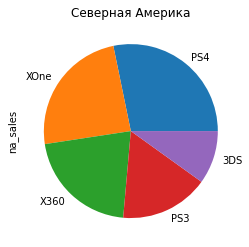

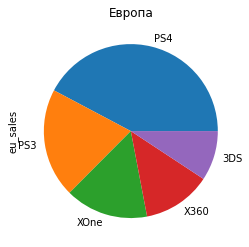

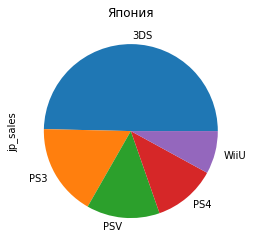

In [19]:
#display(actual_data.head())
#Платформы 
na_platform=actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
eu_platform=actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
jp_platform=actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]
na_platform.plot(kind='pie',title='Северная Америка')
plt.show()
eu_platform.plot(kind='pie',title='Европа')
plt.show()
jp_platform.plot(kind='pie',title='Япония')
plt.show()

Предпочтения по игровым платформам сильно разняться в зависимости от региона, так, например, в Японии половина продаж приходиться на игры 3DS, в Северной Америке чуть больше 50% рынка поделили между собой 2 компании: PS4 и XOne. В Европе предпочитают игры от Play Station.

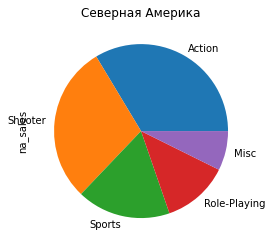

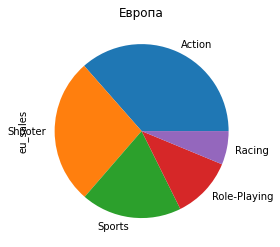

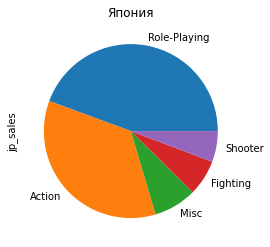

In [20]:
#Жанры:
na_platform=actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
eu_platform=actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
jp_platform=actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]
na_platform.plot(kind='pie',title='Северная Америка')
plt.show()
eu_platform.plot(kind='pie',title='Европа')
plt.show()
jp_platform.plot(kind='pie',title='Япония')
plt.show()

В Северной Америке и Европе предпочтения игроков совпадают: самые любимые игры это игры жанров Action, Shooter и Sports. В Японии же практически весь рынок занимают игры жанров Role-Playing и Action.

rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

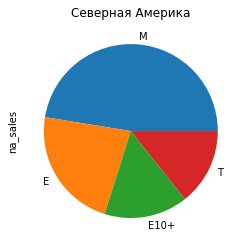

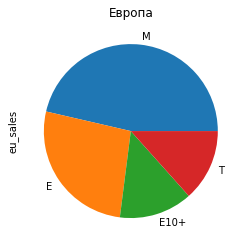

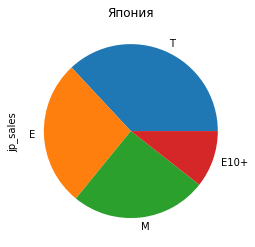

In [21]:
#рейтинг ESRB
na_platform=actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)[:5]
eu_platform=actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)[:5]
jp_platform=actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)[:5]
display(na_platform)
na_platform.plot(kind='pie',title='Северная Америка')
plt.show()
eu_platform.plot(kind='pie',title='Европа')
plt.show()
jp_platform.plot(kind='pie',title='Япония')
plt.show()

В Америке и Европе пользуются наибольшей популярностью игры с рейтингом "для взрослых", в Японии - "для подростков". Также во всех регионах хорошо продаются игры с рейтингов "для всех".


<h2>Проверка гипотез</h2>

<h3>Гипотеза 1</h3>
Нулевая гипотеза: пользовательские рейтинги платформ Xbox One и PC одинаковые. АЛьтернативная гиптеза: пользовательские рейтинги платформ Xbox One и PC разные. 

In [22]:
display(actual_data['platform'].unique())
#display(actual_data.head())
#Подготовим выборки для проверки гипотез:
xone_platform=actual_data[actual_data['platform']=='XOne']['user_score'].dropna()
pc_platform=actual_data[actual_data['platform']=='PC']['user_score'].dropna()
#Проверим средние значения:
print('Средний пользовательский рейтинг платформы XOne: ', xone_platform.mean())
print('Средний пользовательский рейтинг платформы PC: ', pc_platform.mean())
print()

#Проверим гипотезы:
alpha = 0.05 # зададим критический уровень статистической значимости
results = st.ttest_ind(xone_platform, pc_platform) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Средний пользовательский рейтинг платформы XOne:  6.521428571428572
Средний пользовательский рейтинг платформы PC:  6.2696774193548395

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Разница в средних значениях пользовательских рейтингов не боольшая, гипотезу отвергнуть не удалось.

<h3> Гипотеза 2</h3>
Нулевая гипотеза: средние значения пользовательских рейтингов жанров Action и Sports равны.
Альтернативная гипотеза: средние значения пользовательских рейтингов жанров Action и Sports не равны.

In [23]:
display(actual_data['genre'].unique())
#Подготовим выборки для проверки гипотез:
action_genre=actual_data[actual_data['genre']=='Action']['user_score'].dropna()
sports_genre=actual_data[actual_data['genre']=='Sports']['user_score'].dropna()

#Проверим срение значения:
print('Среднее значение пользовательсткого рейинга для жанра Action: ', action_genre.mean())
print('Среднее значение пользовательсткого рейинга для жанра Sports: ', sports_genre.mean())
print()

#Проверим гипотезы:

results = st.ttest_ind(action_genre, sports_genre) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

Среднее значение пользовательсткого рейинга для жанра Action:  6.837532133676092
Среднее значение пользовательсткого рейинга для жанра Sports:  5.238124999999999

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Средние значения пользовательских рейтингов по жанрам сильно различаются, альтернативная гипотеза подтвердилась.

<h2>Вывод</h2>

По результатам проведенного исследования рвнка компьюетрных игр можно сделать ряд выводов. Прежде всего, стратегия рекланых компаний должна быть различной для разных рынков сбыта. Если, например, рынки Северной Америки и Европы схожи в своих предпочтениях, то у игроков Японии интересы заметно отличаются.
Так, например, для Японии стоит сделать ставку на игры для подростков на платформе  Nintendo 3DS в жанрах RPG и Action. Игроки западного мира предпочитают игры для взрослых, наиболее востребованы игры для PS4 в жанрах Action и Shooter, но в Северной Америке также популярны игры для  Xbox One, а в Европе еще не все игроки перешли с PlayStation3 на PlayStation4. Сходно то, что во всех регионах популярны игры с рейтингом "для всех".
При покупке конкретных игр можно ориентироваться на рейтинги от критиков, тогда как пользовательские рейтинги не следует учитывать при планировании продаж.